# Module58 EDA-1 Assignment

Q1. What are the key features of the wine quality data set? Discuss the importance of each feature in
predicting the quality of wine.

A1. These are the key features of the wine quality data set -

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving redWineData.csv to redWineData.csv


In [ ]:
# The importance of each feature in predicting the quality of wine can be seen by feature importance technique like Random forest:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('redWineData.csv')
df.head()

# As 'quality' is the target variable
X = df.drop(columns = ['quality'])
Y = df['quality']

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, Y_train)

# Get feature imporatnces
importances = rf_model.feature_importances_

# Create a dataFrame for better visaulization
feature_imp_df = pd.DataFrame({'Feature':X.columns, 'Importance': importances}).sort_values(by= 'Importance', ascending= False)

feature_imp_df

,Feature,Importance
10,alcohol,0.270868
9,sulphates,0.148406
1,volatile acidity,0.111547
6,total sulfur dioxide,0.076786
4,chlorides,0.071132
8,Ph,0.061418
3,residual sugar,0.057892
0,fixed acidity,0.053186
7,density,0.050816
2,citric acid,0.050752


Q2. How did you handle missing data in the wine quality data set during the feature engineering process?
Discuss the advantages and disadvantages of different imputation techniques.

A2. Handling Missing Data in the Wine Quality Dataset
During the feature engineering process, missing data can significantly impact model performance. Here’s how missing data can be addressed, followed by a discussion of various imputation techniques:

Approach to Handling Missing Data:

1. Identify Missing Data

2. Determine Missing Data Nature : Random Missingness, Systematic Missingness:

3. Feature-Specific Strategies: Numerical features, Categorical features

4. Implement Imputation

# **Imputation Techniques**

**1.) Mean/Median Imputation**

Method: Replace missing values with the mean or median of the feature.

Advantages:
Simple to implement.
Works well for features with a normal distribution (mean) or skewed data (median).

Disadvantages:
Ignores relationships between features.
Reduces variance and may introduce bias.


**2.) Mode Imputation (for Categorical Data)**

Method: Replace missing values with the most frequent value (mode).

Advantages:
Simple and effective for categorical data.

Disadvantages:
Not suitable if the distribution of categories is highly imbalanced.


**3.) K-Nearest Neighbors (KNN) Imputation**

Method: Uses the k-nearest neighbors to impute missing values based on feature similarity.

Advantages:
Considers relationships between features.
Suitable for datasets where features are correlated.

Disadvantages:
Computationally expensive for large datasets.
Sensitive to outliers.

**4.) Forward/Backward Fill**

Method: Fill missing values using adjacent rows (forward or backward fill).

Advantages:
Effective for time-series or ordered data.

Disadvantages:
Assumes continuity, which may not be valid for all features.

**5.) Domain-Specific Imputation**

Method: Use domain knowledge to fill missing values (e.g., average pH based on wine type).
Advantages:
Results in more accurate imputations.

Disadvantages:
Requires deep domain knowledge.
May not always be feasible.

**6.) Model-Based Imputation**

Method: Use regression or machine learning models to predict missing values.

Advantages:
Accounts for complex relationships.
More accurate for significant amounts of missing data.

Disadvantages:
Requires additional computation and modeling.

Q3. What are the key factors that affect students' performance in exams? How would you go about
analyzing these factors using statistical techniques?

A3. The key factors affecting Student's performance are:-

1. Gender

2. Race/ethnicity

3. Parental level of education

4. Lunch

5. Test preparation course

6. Math score

7. Reading score

8. Writing score



Analyzing these factors using Statistical Techniques :-  

1. **Data Cleaning and Exploration**

a.) Remove missing or inconsistent data.

b.) Use summary statistics (mean, median, mode) to understand distributions.

c.) Visualize the data to observe trends and relationships (e.g., histograms, box plots).

2. **Correlation Analysis**

a.) Use Pearson or Spearman correlation coefficients to identify relationships between variables (e.g., parental education and exam scores).

3. **Hypothesis Testing**

a.) Conduct t-tests or ANOVA to compare means between groups (e.g., comparing exam scores of male vs. female students).

Example Questions:
Do students with higher parental education perform better?
Is there a significant difference in scores between public and private school students?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [ ]:
import pandas as pd
# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Apllying ttest
from scipy.stats import ttest_ind

# Example: Comparing scores between male and female students
male_scores = df[df['gender'] == 'male']['math score']
female_scores = df[df['gender'] == 'female']['math score']
t_stat, p_value = ttest_ind(male_scores, female_scores)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 5.383245869828983, P-value: 9.120185549328822e-08


4. **Regression Analysis**

a.) Perform linear or logistic regression to determine how various factors influence exam scores.

b.) Include predictors like gender, parental education, and study hours.

In [ ]:
from sklearn.linear_model import LinearRegression

X = df[['parental_education_level', 'study_hours']]  # Example predictors
y = df['exam_score']  # Target variable
model = LinearRegression()
model.fit(X, y)
print(f"Coefficients: {model.coef_}, Intercept: {model.intercept_}")


5. **Feature Importance and Machine Learning**

Use machine learning models (e.g., decision trees, random forests) to identify which factors most significantly influence performance.

6. **Clustering Analysis**

Group students based on performance levels and analyze their characteristics using clustering algorithms (e.g., k-means).

In [ ]:
from sklearn.cluster import KMeans

X = df[['math_score', 'reading_score', 'writing_score']]  # Example performance metrics
kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(X)
print(df.groupby('cluster').mean())


7. **Visualization for Insights**

Use heatmaps, scatter plots, and bar charts to visualize relationships and trends.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


Q4. Describe the process of feature engineering in the context of the student performance data set. How
did you select and transform the variables for your model?

A4. **Steps in Feature Engineering**

1. **Understand the Dataset**

a.) Start by examining the dataset using descriptive statistics and visualizations.

b.) Identify the key variables (e.g., exam scores, parental education, gender, study hours) and their relationships.


In [ ]:
# Summary statistics
print(df.describe())

# Visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

2. **Handle Missing and Outlier Values**

a.) Missing Values: Fill missing values with appropriate strategies:
Numerical variables: Use mean/median imputation.
Categorical variables: Use the mode or a separate "Unknown" category.

b.) Outliers: Detect and handle outliers using methods like IQR or z-scores.



In [ ]:
# Fill missing numerical values with median
df['study_hours'] = df['study_hours'].fillna(df['study_hours'].median())

# Fill missing categorical values with "Unknown"
df['parental_education_level'] = df['parental_education_level'].fillna('Unknown')

# Remove outliers based on z-scores
from scipy.stats import zscore
df = df[(zscore(df['math_score']) < 3)]


3. **Encode Categorical Variables**

Convert categorical variables into numerical formats for compatibility with machine learning algorithms.

a.) One-Hot Encoding: Suitable for nominal categories like gender.

b.) Ordinal Encoding: Suitable for ordinal categories like parental education level.



In [ ]:
# One-Hot Encoding for gender
df = pd.get_dummies(df, columns=['gender'], drop_first=True)

# Ordinal Encoding for parental education level
education_mapping = {
    'Some High School': 1,
    'High School': 2,
    'Some College': 3,
    'Associate Degree': 4,
    'Bachelor’s Degree': 5,
    'Master’s Degree': 6
}
df['parental_education_level'] = df['parental_education_level'].map(education_mapping)


4. **Create New Features**

a.) Aggregate Scores: Combine math, reading, and writing scores into a single feature like total_score or average_score.

b.) Interaction Features: Create features that represent interactions between variables (e.g., study_hours * parental_education_level).

c.) Derived Features: For example, categorize total scores into performance groups (e.g., "Low," "Medium," "High").

In [ ]:
# Create aggregate scores
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

# Create performance groups
df['performance_group'] = pd.cut(df['average_score'],
                                 bins=[0, 60, 80, 100],
                                 labels=['Low', 'Medium', 'High'])

5. **Normalize/Scale Numerical Features**

Normalize or standardize numerical features to ensure they are on the same scale, especially for distance-based models like k-means or SVMs.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['math_score', 'reading_score', 'writing_score', 'study_hours']] = scaler.fit_transform(
    df[['math_score', 'reading_score', 'writing_score', 'study_hours']]
)

6. **Select Relevant Features**

Use techniques like feature importance scores, correlation analysis, or dimensionality reduction (e.g., PCA) to select the most relevant features.

In [ ]:
# Correlation analysis
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Feature importance using Random Forest
from sklearn.ensemble import RandomForestRegressor

X = df[['study_hours', 'parental_education_level', 'gender_male']]
y = df['average_score']
model = RandomForestRegressor()
model.fit(X, y)

# Display feature importance
importance = pd.Series(model.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


**Key Transformations for the Model**

After feature engineering, the key features for predicting student performance might include:

1. Study hours (scaled and normalized).

2. Parental education level (ordinal encoded).

3. Gender (one-hot encoded).

4. Aggregate/Derived scores (e.g., total_score, average_score).

5. Interaction terms (e.g., study_hours * parental_education_level).


Q5. Load the wine quality data set and perform exploratory data analysis (EDA) to identify the distribution
of each feature. Which feature(s) exhibit non-normality, and what transformations could be applied to
these features to improve normality?

A5.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving redWineData.csv to redWineData.csv


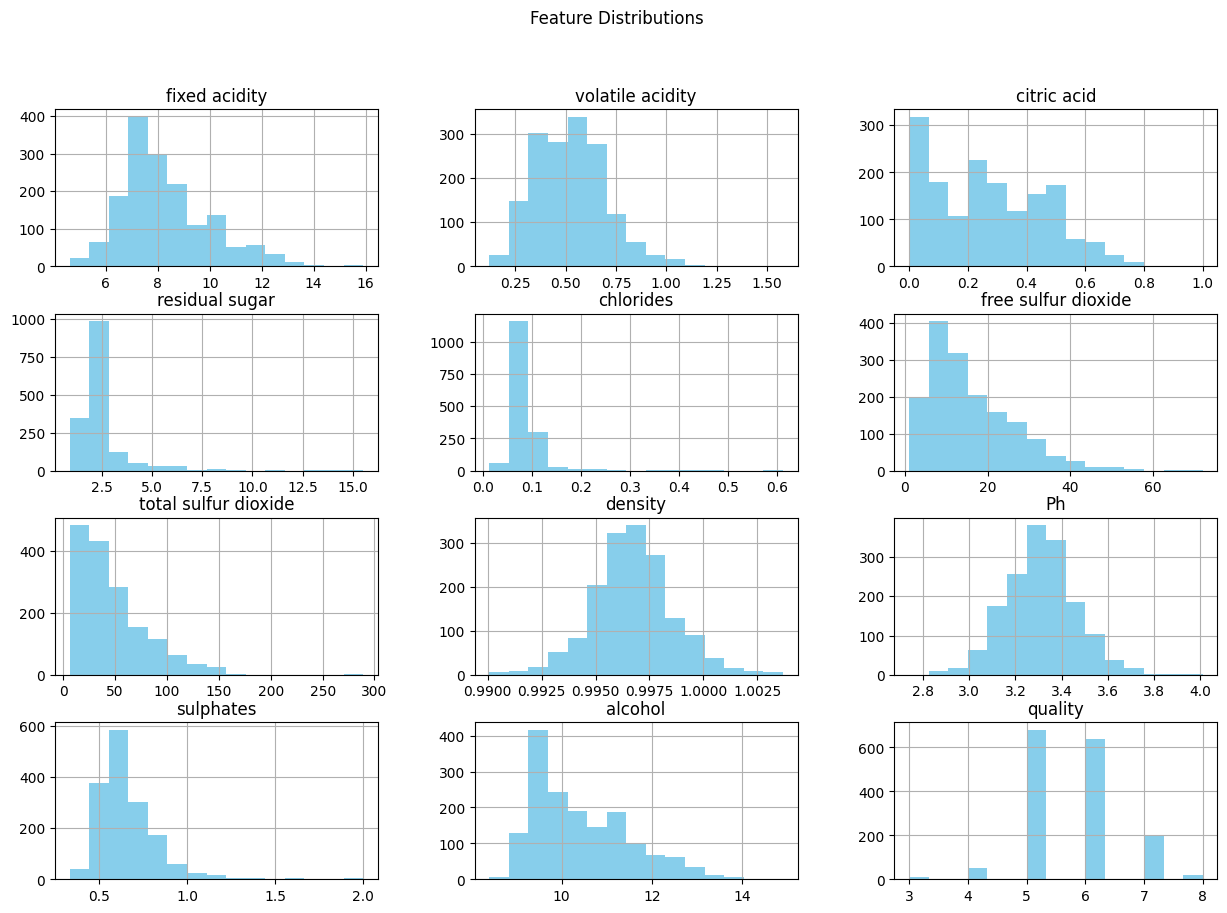

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('redWineData.csv')

# Step 3: Explore Feature Distributions
df.hist(bins = 15, figsize = (15,10), layout = (4,3), color = 'skyblue')
plt.suptitle('Feature Distributions')
plt.show()

In [ ]:
# Step 4: Check for Non-Normality
# Use the Shapiro-Wilk test to identify features that deviate from normality.

from scipy.stats import shapiro

# Test for normality
for column in df.columns:
    stat, p = shapiro(df[column])
    print(f'{column}: Statistics={stat}, p={p}')
    if p < 0.05:
        print(f"--> {column} does not follow a normal distribution.")
    else:
        print(f"--> {column} follows a normal distribution.")


fixed acidity: Statistics=0.9420297903867135, p=1.525011710791387e-24
--> fixed acidity does not follow a normal distribution.
volatile acidity: Statistics=0.9743368805536368, p=2.692934735712727e-16
--> volatile acidity does not follow a normal distribution.
citric acid: Statistics=0.9552919890668837, p=1.0219317829705018e-21
--> citric acid does not follow a normal distribution.
residual sugar: Statistics=0.5660771057163958, p=1.0201616453237868e-52
--> residual sugar does not follow a normal distribution.
chlorides: Statistics=0.48424655122518334, p=1.1790556953147118e-55
--> chlorides does not follow a normal distribution.
free sulfur dioxide: Statistics=0.9018394916138583, p=7.694596687816645e-31
--> free sulfur dioxide does not follow a normal distribution.
total sulfur dioxide: Statistics=0.8732245604736051, p=3.5734514102654424e-34
--> total sulfur dioxide does not follow a normal distribution.
density: Statistics=0.9908655166510911, p=1.936052131352189e-08
--> density does not

In [ ]:
# Step 5: Apply Transformations
# If a feature is non-normal, apply transformations like log, square root, or Box-Cox to improve normality.

import numpy as np
from scipy.stats import boxcox

# Example: Apply log transformation to 'fixed acidity' if needed
df['fixed_acidity_log'] = np.log1p(df['fixed_acidity'])

# Example: Apply Box-Cox transformation (requires positive values)
df['fixed_acidity_boxcox'], _ = boxcox(df['fixed_acidity'] + 1)

# Plot transformed feature
sns.histplot(df['fixed_acidity_boxcox'], kde=True, color='green')
plt.title('Transformed Fixed Acidity')
plt.show()


In [ ]:
# Step 6: Correlation Analysis
# Check the relationships between features using a heatmap.

# Correlation matrix
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Step 7: Insights

After transformations and visualizations:

1. List which features exhibit non-normality.

2. Summarize how transformations (e.g., log, Box-Cox) improved normality.

3. Identify the most correlated features with quality to target for further analysis.

Q6. Using the wine quality data set, perform principal component analysis (PCA) to reduce the number of
features. What is the minimum number of principal components required to explain 90% of the variance in
the data?

A6. We perform Principal Component Analysis (PCA) on the wine quality dataset to reduce the number of features and determine the minimum number of components required to explain 90% of the variance.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving redWineData.csv to redWineData.csv


In [ ]:
# Steps for PCA in Python

# step1: Import Required Libraries:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


# step2: Load the Dataset:
df = pd.read_csv('redWineData.csv')


# step3: Preprocess the Data:
# 1. Remove target columns like quality if PCA is only for feature reduction.
# 2. Standardize the data to ensure all features are on the same scale.

# Separate features and target variable
X = df.drop(columns=['quality'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# step4: Apply PCA
# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate explained variance ratio
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', linestyle='--', color='b')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()


# step5: Determine Minimum Number of Components for 90% Variance:
# Find the minimum number of components that explain 90% variance
n_components_90 = np.argmax(explained_variance >= 0.90) + 1
print(f"Minimum number of principal components to explain 90% variance: {n_components_90}")




**Explanation of Steps:**

1.) Standardization: PCA is sensitive to the scale of data. Standardizing ensures features contribute equally.

2.) Cumulative Variance Plot: Helps visualize how variance is distributed among components.

3.) Determine Components: Use the cumulative variance ratio to find how many components account for 90% variance.


**Output Interpretation:**
The output will show a plot of cumulative variance, and the printed value will indicate the minimum number of components required to explain at least 90% of the variance.